In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
import scipy
from scipy import stats
import missingno as msno
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [70]:
dataFrame = pd.read_csv('https://raw.githubusercontent.com/priyadarshi0007/ASTCapstone/master/AppointmentData.csv')

In [71]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110388 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110408 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110507 non-null float64
Hipertension      110506 non-null float64
Diabetes          110527 non-null int64
Alcoholism        110505 non-null float64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           107751 non-null object
dtypes: float64(5), int64(4), object(5)
memory usage: 11.8+ MB


In [72]:
#Renaming The Columns

dataFrame.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'HiperTension': 'Hypertension',
                         'Handcap': 'Handicap','No-show':'NoShow'}, inplace = True)

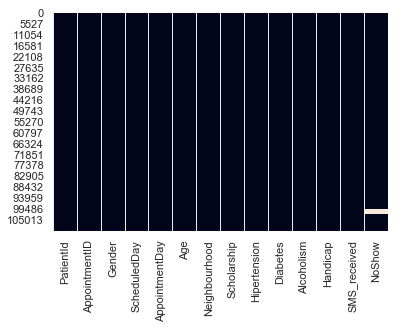

In [73]:
sns.heatmap(dataFrame.isnull(), cbar=False)

In [74]:
dataFrame['Handicap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [75]:
dataFrame.isnull().sum().sum()

3097

In [76]:
dataFrame = dataFrame.dropna()

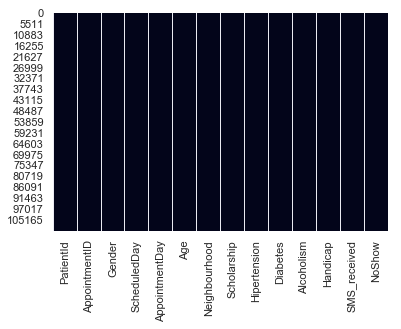

In [77]:
sns.heatmap(dataFrame.isnull(), cbar=False)

In [78]:
dataFrame.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age               float64
Neighbourhood      object
Scholarship       float64
Hipertension      float64
Diabetes            int64
Alcoholism        float64
Handicap            int64
SMS_received        int64
NoShow             object
dtype: object

In [79]:
#Changing the ScheduledDay/AppointmentDay to date and time
dataFrame['ScheduledDay'] = pd.to_datetime(dataFrame['ScheduledDay'])
dataFrame['AppointmentDay'] = pd.to_datetime(dataFrame['AppointmentDay'])

In [80]:
dataFrame['ScheduledDay_year'] = dataFrame['ScheduledDay'].dt.year
dataFrame['ScheduledDay_month'] = dataFrame['ScheduledDay'].dt.month
dataFrame['ScheduledDay_quarter'] = dataFrame['ScheduledDay'].dt.quarter
dataFrame['ScheduledDay_day'] = dataFrame['ScheduledDay'].dt.day
dataFrame['ScheduledDay_hour'] = dataFrame['ScheduledDay'].dt.hour # this only give numer
dataFrame['ScheduledDay_dayOfTheWeek'] = dataFrame['ScheduledDay'].dt.weekday_name

In [81]:
dataFrame['AppointmentDay_year'] = dataFrame['AppointmentDay'].dt.year
dataFrame['AppointmentDay_month'] = dataFrame['AppointmentDay'].dt.month
dataFrame['AppointmentDay_quarter'] = dataFrame['AppointmentDay'].dt.quarter
dataFrame['AppointmentDay_day'] = dataFrame['AppointmentDay'].dt.day
dataFrame['AppointmentDay_hour'] = dataFrame['AppointmentDay'].dt.hour # this only give numer
dataFrame['AppointmentDay_dayOfTheWeek'] = dataFrame['AppointmentDay'].dt.weekday_name

In [82]:
dataFrame['difference'] = abs(dataFrame['AppointmentDay']- dataFrame['ScheduledDay'])
dataFrame['difference'] = np.floor(dataFrame['difference'].apply(lambda x: x.total_seconds() / (3600 * 24)))

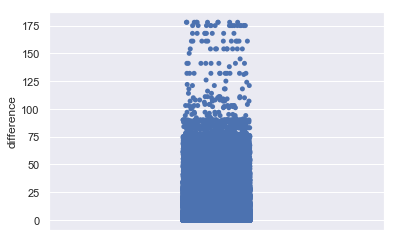

In [83]:
sns.stripplot(data = dataFrame, y = 'difference', jitter = True)

In [84]:
#dataFrame.columns[dataFrame.isnull().any()]
#np.where(pd.isnull(dataFrame))
#dataFrame['NoShow'].isnull() == True

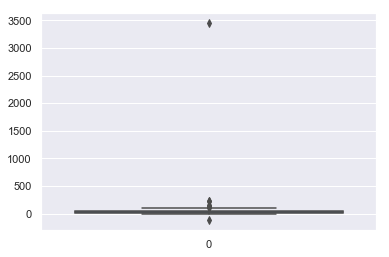

In [85]:
sns.boxplot(data=dataFrame['Age'])

In [86]:
dataFrame =dataFrame[(dataFrame.Age >= 0) & (dataFrame.Age<= 110)]

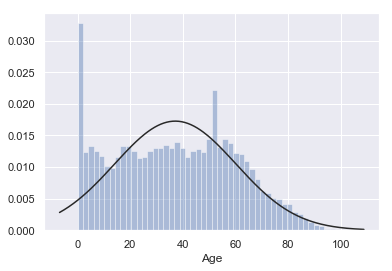

In [87]:
sns.distplot(dataFrame['Age'], kde=False, fit=stats.norm);

# EDA

Text(0, 0.5, 'Frequency')

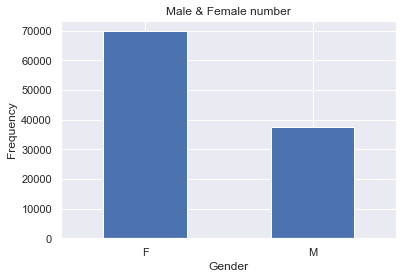

In [88]:
countGender = pd.value_counts(dataFrame['Gender'],sort = True)
countGender.plot(kind = 'bar', rot = 0)
plt.title('Male & Female number')
plt.xlabel("Gender")
plt.ylabel("Frequency")

In [89]:
#df = pd.DataFrame(data={"age": randint(10, 50, 1000),
 #                   "response": [choice(['Yes', 'No']) for i in range(1000)]})

dataFrame['age_group'] = pd.cut(dataFrame.Age, bins=[g for g in range(0, 110, 10)], include_lowest=True)
dataFrame.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,ScheduledDay_hour,ScheduledDay_dayOfTheWeek,AppointmentDay_year,AppointmentDay_month,AppointmentDay_quarter,AppointmentDay_day,AppointmentDay_hour,AppointmentDay_dayOfTheWeek,difference,age_group
0,2.990000e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0.0,1.0,0,...,18,Friday,2016,4,2,29,0,Friday,0.0,"(60.0, 70.0]"
1,5.590000e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,0.0,0,...,16,Friday,2016,4,2,29,0,Friday,0.0,"(50.0, 60.0]"
2,4.260000e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0.0,0.0,0,...,16,Friday,2016,4,2,29,0,Friday,0.0,"(60.0, 70.0]"
3,8.680000e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0.0,0.0,0,...,17,Friday,2016,4,2,29,0,Friday,0.0,"(-0.001, 10.0]"
4,8.840000e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0.0,1.0,1,...,16,Friday,2016,4,2,29,0,Friday,0.0,"(50.0, 60.0]"


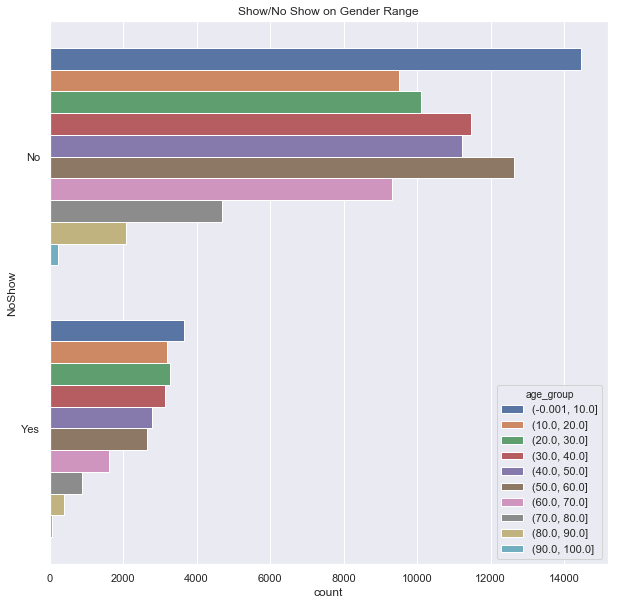

In [56]:
plt.figure(figsize=(10, 10))
sns.set(style="darkgrid")
sns.countplot(  y = 'NoShow',
              data=dataFrame, 
              order = dataFrame['NoShow'].value_counts().index,
              hue='age_group').set_title('Show/No Show on Gender Range') #palette="Greens_d")
#plt.title('Show/No Show on Gender Range')
plt.show()

Text(0.5, 1.0, 'Show/No Show on Gender Range')

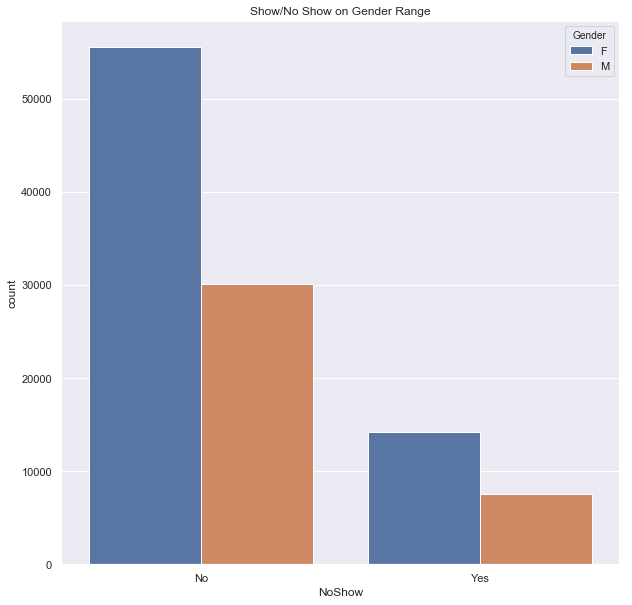

In [57]:
plt.figure(figsize=(10, 10))
sns.countplot(  x = 'NoShow',
              data=dataFrame, 
              order = dataFrame['NoShow'].value_counts().index,
              hue='Gender').set_title('Show/No Show on Gender Range')

Text(0.5, 1.0, 'Show/No Show on Gender Range')

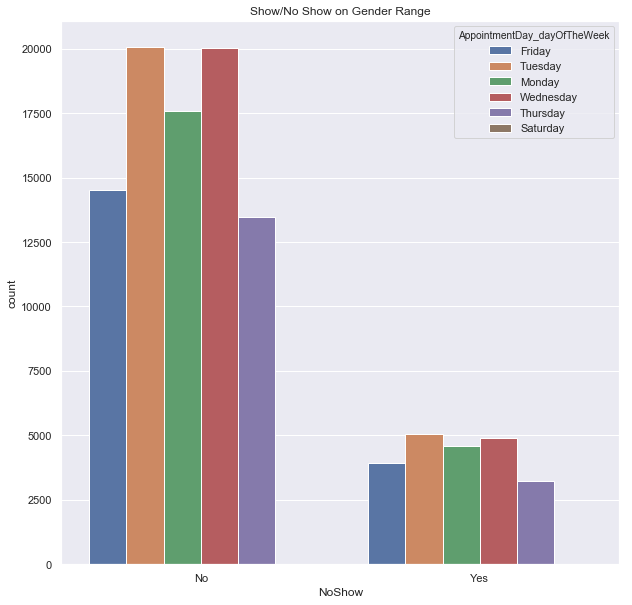

In [58]:
plt.figure(figsize=(10, 10))
sns.countplot( x = 'NoShow',
              data=dataFrame, 
              order = dataFrame['NoShow'].value_counts().index,
              hue='AppointmentDay_dayOfTheWeek').set_title('Show/No Show on Gender Range') 

In [68]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107419 entries, 0 to 110526
Data columns (total 25 columns):
PatientId                      107419 non-null float64
Gender                         107419 non-null object
Age                            107419 non-null float64
Neighbourhood                  107419 non-null object
Scholarship                    107419 non-null float64
Hipertension                   107419 non-null float64
Diabetes                       107419 non-null int64
Alcoholism                     107419 non-null float64
Handicap                       107419 non-null int64
SMS_received                   107419 non-null int64
NoShow                         107419 non-null int64
ScheduledDay_year              107419 non-null int64
ScheduledDay_month             107419 non-null int64
ScheduledDay_quarter           107419 non-null int64
ScheduledDay_day               107419 non-null int64
ScheduledDay_hour              107419 non-null int64
ScheduledDay_dayOfTheWeek    

# Data Pre-Processing


In [90]:
dataFrame['ScheduledDay_dayOfTheWeek'] = dataFrame['ScheduledDay'].dt.weekday
dataFrame['AppointmentDay_dayOfTheWeek'] = dataFrame['AppointmentDay'].dt.weekday

In [104]:
#We need to handle the Object data type to fit for the model
dataFrame = dataFrame.drop(columns=['PatientId',
                                    'ScheduledDay',
                                    'AppointmentDay',
                                    'AppointmentID',
                                    'AppointmentDay_quarter',
                                    'AppointmentDay_year',
                                    'AppointmentDay_hour'
                                   ])


In [ ]:
dataFrame['Gender'].replace(0, 'F',inplace=True)
dataFrame['Gender'].replace(1, 'M',inplace=True)

In [ ]:
#Not working for OBJECT TYPE
#dataFrame['NoShow']= dataFrame['NoShow'].replace(1, 'Yes',inplace=True)
#dataFrame['NoShow']= dataFrame['NoShow'].replace(0, 'No',inplace=True)

In [100]:
dataFrame.NoShow = dataFrame.NoShow.apply(lambda x: 1 if x == 'Yes' else 0)

In [101]:
dataFrame['NoShow'].head(n=10)

0    0
1    0
2    0
3    0
4    0
5    0
6    1
7    1
8    0
9    0
Name: NoShow, dtype: int64

# Predictions

In [105]:
dataFrame.corr()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,ScheduledDay_year,ScheduledDay_month,ScheduledDay_quarter,ScheduledDay_day,ScheduledDay_hour,ScheduledDay_dayOfTheWeek,AppointmentDay_month,AppointmentDay_day,AppointmentDay_dayOfTheWeek,difference
Age,1.000000,-0.093227,0.503713,0.291766,0.096340,0.077414,0.016309,-0.060382,-0.027108,-0.001729,-0.030102,-0.011260,0.015856,0.012897,0.019381,-0.008969,0.002942,0.035488
Scholarship,-0.093227,1.000000,-0.019503,-0.024736,0.033560,-0.008097,0.000008,0.028766,0.001405,0.017507,0.026272,0.007887,-0.025203,-0.005151,-0.003811,0.002939,-0.000880,-0.031892
Hipertension,0.503713,-0.019503,1.000000,0.432791,0.089741,0.080089,-0.004690,-0.035136,-0.035834,0.025361,0.015137,-0.000077,-0.032181,0.002254,0.004061,-0.007792,0.003023,-0.017521
Diabetes,0.291766,-0.024736,0.432791,1.000000,0.019962,0.057429,-0.012861,-0.014957,-0.006831,0.025565,0.010215,-0.007344,-0.013525,0.000894,0.004025,-0.004249,0.006445,-0.027259
Alcoholism,0.096340,0.033560,0.089741,0.019962,1.000000,0.005166,-0.025527,-0.001065,0.004260,0.029696,0.018105,-0.004155,-0.002749,0.005611,0.003996,-0.002431,0.002584,-0.038840
Handicap,0.077414,-0.008097,0.080089,0.057429,0.005166,1.000000,-0.023377,-0.006258,-0.006305,0.014325,0.006660,-0.000692,0.001900,0.001766,-0.001195,-0.003020,0.005048,-0.018740
SMS_received,0.016309,0.000008,-0.004690,-0.012861,-0.025527,-0.023377,1.000000,0.125181,-0.019424,-0.298938,-0.116704,0.170692,0.062529,0.077293,0.100329,-0.044028,-0.091524,0.385600
NoShow,-0.060382,0.028766,-0.035136,-0.014957,-0.001065,-0.006258,0.125181,1.000000,-0.006253,-0.161392,-0.058000,0.043557,0.061414,0.006446,-0.022817,0.004114,0.001252,0.179568
ScheduledDay_year,-0.027108,0.001405,-0.035834,-0.006831,0.004260,-0.006305,-0.019424,-0.006253,1.000000,-0.242496,-0.252237,0.013221,-0.008394,0.018743,-0.011153,0.006643,-0.007653,-0.247723
ScheduledDay_month,-0.001729,0.017507,0.025361,0.025565,0.029696,0.014325,-0.298938,-0.161392,-0.242496,1.000000,0.566707,-0.440668,-0.061454,-0.034165,0.519533,-0.132150,-0.040330,-0.599609


In [106]:
x = dataFrame[['Age','Scholarship','Hipertension','Diabetes','Alcoholism',
               'Handicap','SMS_received','ScheduledDay_year','ScheduledDay_month','ScheduledDay_quarter',
               'ScheduledDay_day','ScheduledDay_hour','ScheduledDay_dayOfTheWeek','AppointmentDay_month',
               'AppointmentDay_day','AppointmentDay_dayOfTheWeek','difference'
              ]]
y = dataFrame ['NoShow']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75193, 17)
(75193,)
(32226, 17)
(32226,)


In [120]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(x_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.7734748339849811

In [108]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [112]:
for feature in zip(x, clf.feature_importances_):
    print(feature)

('Age', 0.3686821218875235)
('Scholarship', 0.016972337903929862)
('Hipertension', 0.015594303307220116)
('Diabetes', 0.011974996827838692)
('Alcoholism', 0.008856872340929649)
('Handicap', 0.007560560929800711)
('SMS_received', 0.015597475941439287)
('ScheduledDay_year', 8.17533158576844e-05)
('ScheduledDay_month', 0.02003183259335477)
('ScheduledDay_quarter', 0.0027197769884824163)
('ScheduledDay_day', 0.0679747245645904)
('ScheduledDay_hour', 0.1802011642463814)
('ScheduledDay_dayOfTheWeek', 0.04277807161805948)
('AppointmentDay_month', 0.006998136944769711)
('AppointmentDay_day', 0.060321161202025055)
('AppointmentDay_dayOfTheWeek', 0.03878071699593661)
('difference', 0.1348739923918605)


In [109]:
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.15)

In [ ]:
#for feature_list_index in sfm.get_support(indices=True):
 #   print(x[feature_list_index])

In [115]:
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

In [128]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=500, random_state=10, n_jobs=-1,max_depth=10)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [129]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.8002854837708683